In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

## Business Objective
##TODO : explain business objective 


## Data Cleaning

In [2]:
bikes=pd.read_csv("day.csv")
len(bikes.columns)

16

In [3]:
pd.set_option('display.max_columns',16)
bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Check for any empty rows, outliers

In [4]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
bikes.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

- No rows are duplicated

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Date is already decomposed into year(yr),month(mnth),weekday etc columns
- All other columns are in int64 or float64 format

In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
cat_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit']
num_vars=['temp','atemp','hum','windspeed']


#### Check numerical variables for outliers

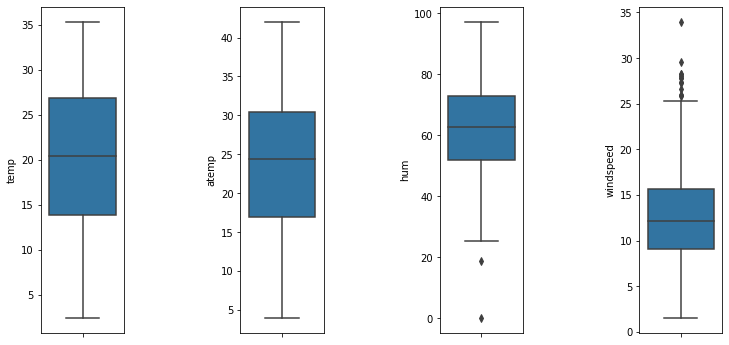

In [9]:
plt.figure(figsize=(14,6))
i=1
for var in num_vars:
    plt.subplot(1,8,i)
    sns.boxplot(y=bikes[var])
    i=i+2
plt.show()

In [10]:
print(bikes['windspeed'].quantile(0.01))
print(bikes['windspeed'].quantile(0.99))
                                  

3.548992546
27.380947620000004


In [11]:
bikes_filtered=bikes[(bikes['windspeed']<25)]

In [12]:
bikes_filtered=bikes_filtered[(bikes_filtered['hum']!=0)]

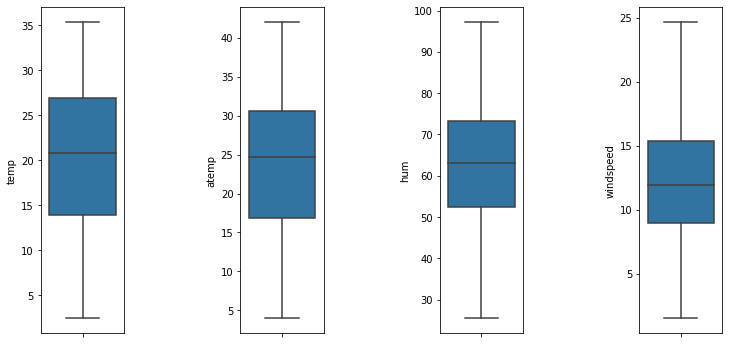

In [13]:
plt.figure(figsize=(14,6))
i=1
for var in num_vars:
    plt.subplot(1,8,i)
    sns.boxplot(y=bikes_filtered[var])
    i=i+2
plt.show()

### Analysis
- Humidity and Windspeed have some outliers but they fall under valid range
- These outlieres humidity anf windspeed can be ignored

#### Check categorical variables for outliers 

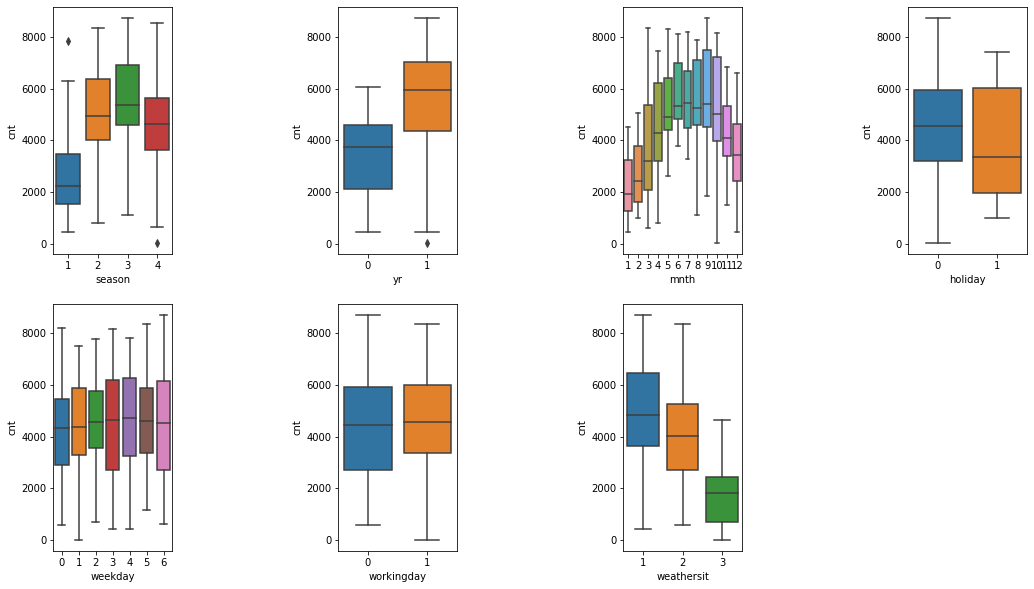

In [14]:
plt.figure(figsize=(20,10))
i=1
for var in cat_vars:
    plt.subplot(2,8,i)
    sns.boxplot(x=bikes[var],y=bikes['cnt'])
    i=i+2
plt.show()

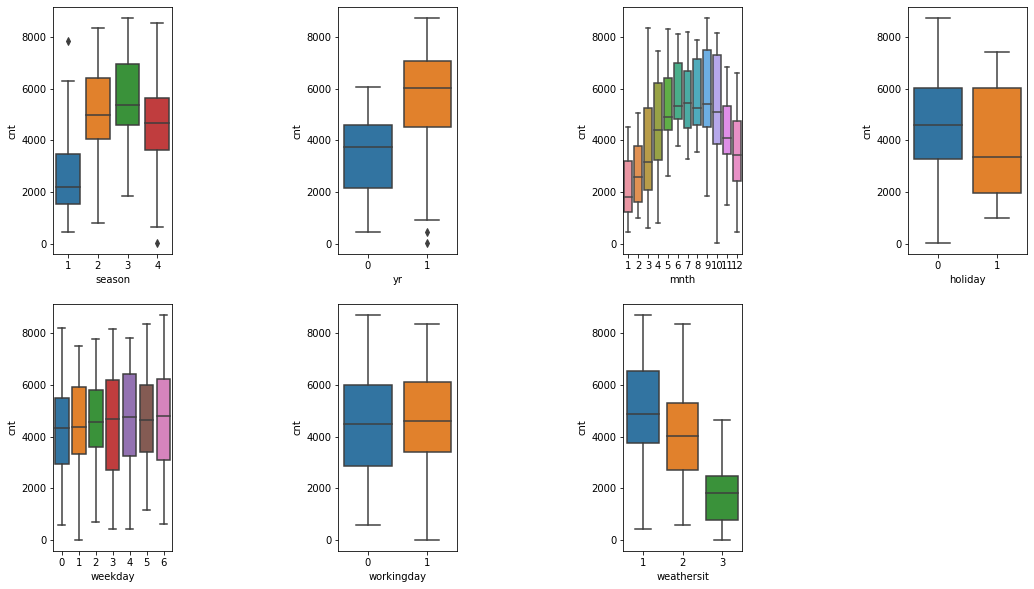

In [15]:
plt.figure(figsize=(20,10))
i=1
for var in cat_vars:
    plt.subplot(2,8,i)
    sns.boxplot(x=bikes_filtered[var],y=bikes['cnt'])
    i=i+2
plt.show()

In [16]:
bikes[(bikes['season']==1 ) & (bikes['cnt']>7000 )]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
440,441,17-03-2019,1,1,3,0,6,0,2,21.080847,25.2523,75.5833,7.417168,3155,4681,7836


In [17]:
print(bikes[bikes['season']==1 ].cnt.mean())
print(bikes[bikes['season']==1 ].cnt.median())

2608.411111111111
2222.5


In [18]:
print(bikes[((bikes['season']==1 ) & (bikes['cnt']<7000 ))].cnt.mean())
print(bikes[((bikes['season']==1 ) & (bikes['cnt']<7000 ))].cnt.median())

2579.2067039106146
2209.0


In [19]:
bikes[(bikes['season']==4 ) & (bikes['cnt']<1000 )]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
301,302,29-10-2018,4,0,10,0,6,0,3,10.420847,11.39565,88.2500,23.541857,57,570,627
340,341,07-12-2018,4,0,12,0,3,1,3,16.810000,20.01230,97.0417,17.833725,50,655,705
666,667,29-10-2019,4,1,10,0,1,1,3,18.040000,21.97000,88.0000,23.999400,2,20,22


- on 17-03-2019 there is a spike in 'cnt
- on 29-10-2019 there is a dip in cnt
- Though there are some outliers when season is '1' but it does not impact mean and median significantly.

## EDA

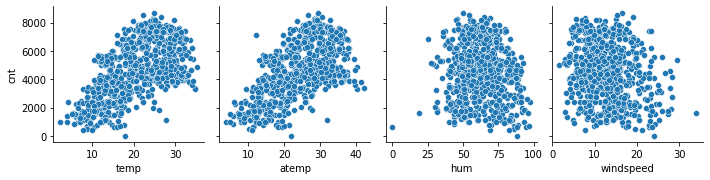

In [20]:
sns.pairplot(data=bikes,x_vars=bikes[num_vars],y_vars=['cnt'])
plt.show()

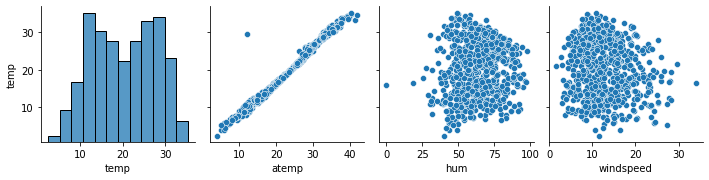

In [21]:
sns.pairplot(data=bikes,x_vars=bikes[num_vars],y_vars=['temp'])
plt.show()

- cnt increase linearly with 'temp' . Also there more data points in the higher temp zone.
  This shows there is demand for bike sharing daay temperature is towards higher range 
- Similar observation is there for 'atemp'
- There is no clear relation between 'hum' an 'cnt'. But thre are more data points for the days
  when humidiy is more. 
- There is no clear relation between 'windspeed' an 'cnt'. But there are more data points for the days
  when windspeed is less.

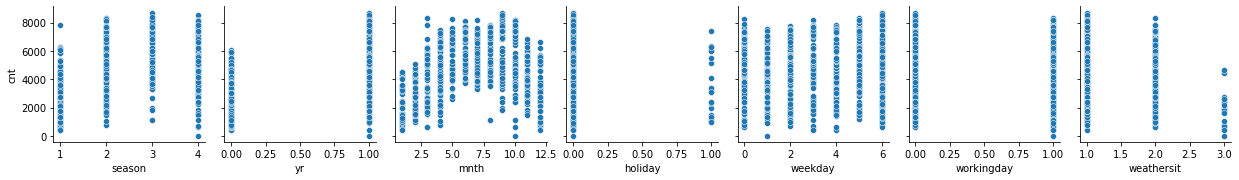

In [22]:
sns.pairplot(data=bikes,x_vars=bikes[cat_vars],y_vars=['cnt'])
plt.show()

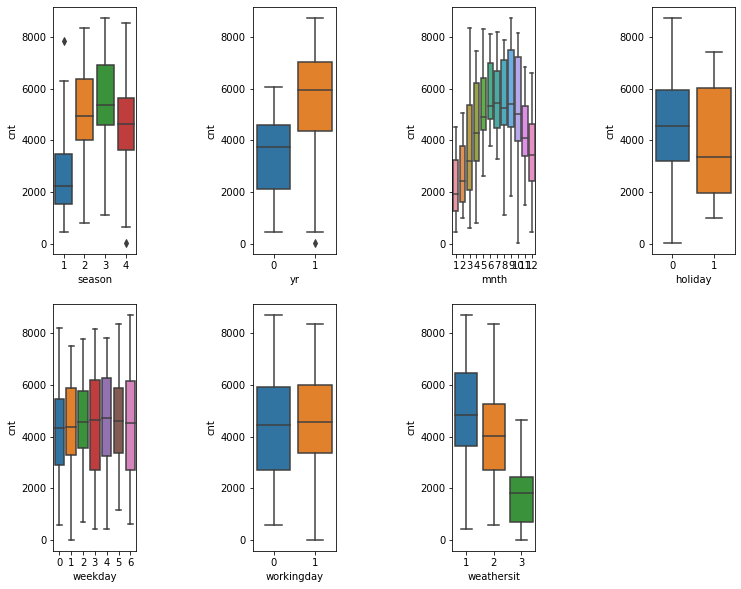

In [23]:
plt.figure(figsize=(14,10))
i=1
for var in cat_vars:
    plt.subplot(2,8,i)
    sns.boxplot(x=bikes[var],y=bikes['cnt'])
    i=i+2
plt.show()

## Model Buidling
- Dropping invalid columns
- Creating dummy variable for categorical variable
- Splitting Dataset
- Normalizing Training data set
- Running RFE
- Dropping feature manually based on pvalue and VIF

In [179]:
bikes=bikes.drop('instant',axis=1)
bikes=bikes.drop('dteday',axis=1)
bikes=bikes.drop('casual',axis=1)
bikes=bikes.drop('registered',axis=1)

KeyError: "['instant'] not found in axis"

- instant ,dteday, dropped as they are not valid variables for analysis
- casual and registered columns are not independent variables. also they are related directly to 'cnt' variables cnt=casual+registered. So they too are dropped

In [180]:
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [181]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [182]:
bikes_with_dummies=bikes
for cat in cat_vars:
    dummies=pd.get_dummies(bikes[cat],prefix=cat,drop_first=True)
    bikes_with_dummies=pd.concat([bikes_with_dummies,dummies],axis=1)
pd.set_option('display.max_columns', None)
bikes_with_dummies.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [183]:

bikes_data=bikes_with_dummies.drop(cat_vars,axis=1)
bikes_data.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [184]:
bikes_data.shape

(730, 30)

- Dummy variables created and corresponding categorical variables dropped

In [185]:
bikes_data[num_vars].corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


In [186]:
bikes_data=bikes_data.drop('atemp',axis=1)

- temp and atemp very highly correlated. so 'atemp' is dropped

In [187]:
from sklearn.model_selection import train_test_split

In [322]:
bikes_train,bikes_test=train_test_split(bikes_data,train_size=0.7, random_state=100)

In [323]:
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(220, 29)


In [324]:
from sklearn.preprocessing import MinMaxScaler

In [325]:
scaler=MinMaxScaler()

In [326]:
num_vars=['temp', 'hum', 'windspeed',  'cnt']

In [327]:
bikes_train[num_vars]=scaler.fit_transform(bikes_train[num_vars])
bikes_test[num_vars]=scaler.transform(bikes_test[num_vars])

In [328]:
bikes_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

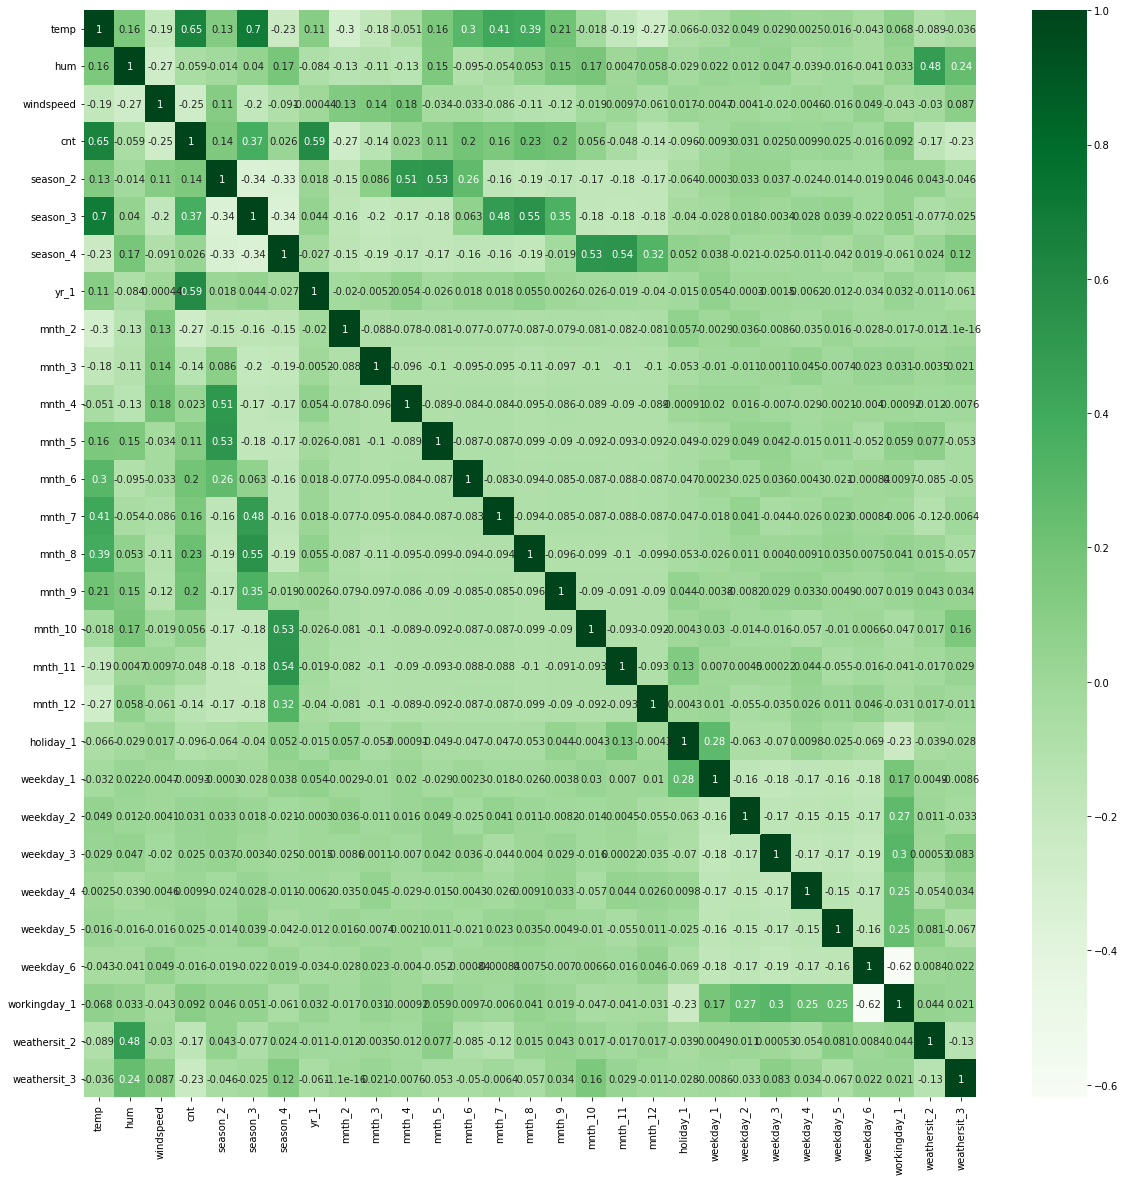

In [329]:
plt.figure(figsize=(20,20))
sns.heatmap(bikes_train.corr(),cmap='Greens',annot=True)

In [330]:
y_train=bikes_train['cnt']
y_test=bikes_test['cnt']

In [331]:
X_train=bikes_train[bikes_train.columns[bikes_train.columns!='cnt']]
X_test=bikes_test[bikes_test.columns[bikes_test.columns!='cnt']]

In [333]:
X_train_sm=sm.add_constant(X_train)
lr_model=sm.OLS(y_train,X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          3.00e-181
Time:                        10:37:32   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1763      0.030      5.797   

In [334]:
def calculate_vif(X_train): 
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values('VIF',ascending=False)
    print(vif)

In [335]:
def build_and_check_model(x_train):   
    x_train_sm=sm.add_constant(x_train)
    model=sm.OLS(y_train,x_train_sm).fit()
    print(model.summary())
    calculate_vif(x_train)
    return model

In [336]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)
t=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
print(list(t))
vars=[]
[vars.append(t[i][0]) if t[i][1]==True else 'x' for i in range(len(t))]
X_train_1=X_train[vars]
lr_1=sm.OLS(y_train,sm.add_constant(X_train_1))
lr_1=sm.OLS(y_train,sm.add_constant(X_train_1))
X_train_1_sm=sm.add_constant(X_train_1)
lr_model_1=sm.OLS(y_train,X_train_1_sm).fit()
print(lr_model_1.summary())

[('temp', True, 1), ('hum', True, 1), ('windspeed', True, 1), ('season_2', True, 1), ('season_3', True, 1), ('season_4', True, 1), ('yr_1', True, 1), ('mnth_2', False, 6), ('mnth_3', False, 2), ('mnth_4', False, 4), ('mnth_5', False, 3), ('mnth_6', False, 5), ('mnth_7', False, 7), ('mnth_8', True, 1), ('mnth_9', True, 1), ('mnth_10', True, 1), ('mnth_11', False, 8), ('mnth_12', False, 9), ('holiday_1', True, 1), ('weekday_1', False, 10), ('weekday_2', False, 11), ('weekday_3', False, 13), ('weekday_4', False, 14), ('weekday_5', False, 12), ('weekday_6', True, 1), ('workingday_1', True, 1), ('weathersit_2', True, 1), ('weathersit_3', True, 1)]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sun, 10 Jul 

##### season_3 has high p value(>0.05). dropping this variable

In [361]:
X_train_2=X_train_1.drop('season_3',axis=1)
model_2=build_and_check_model(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.70e-192
Time:                        10:44:47   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

##### all varibles have p value <0.05. However hum has high VIF. Dropping hum

In [444]:
X_train_3=X_train_2.drop('hum',axis=1)
model_3=build_and_check_model(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.97e-188
Time:                        11:09:21   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914   

##### mnth_10 has high p value. dropping this variable

In [445]:
X_train_4=X_train_3.drop('mnth_10',axis=1)
model_4=build_and_check_model(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.64e-189
Time:                        11:09:32   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740   

- temp has high VIF >5 . Dropping temp

In [446]:
X_train_5=X_train_4.drop('temp',axis=1)
model_5=build_and_check_model(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     85.70
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.42e-107
Time:                        11:09:33   Log-Likelihood:                 309.79
No. Observations:                 510   AIC:                            -595.6
Df Residuals:                     498   BIC:                            -544.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3673      0.022     16.529   

- Accuracy dropped heavily byt dropping temp column. So restoring temp and checking correlation heatmap

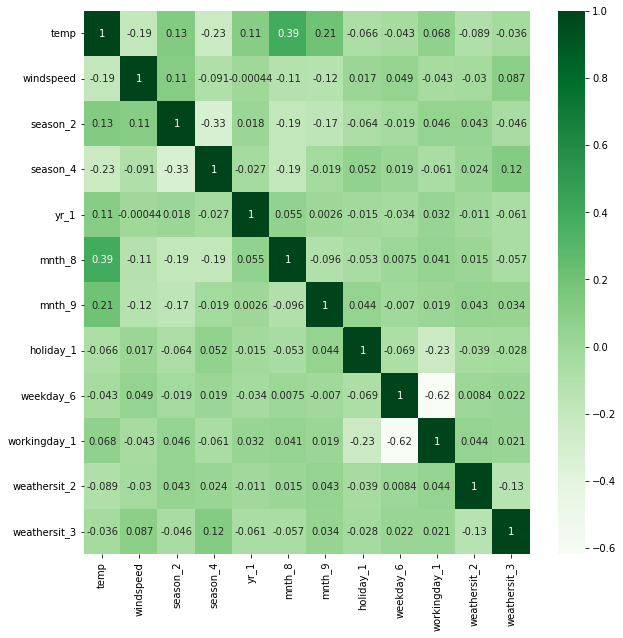

In [447]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_4.corr(),cmap='Greens',annot=True)
plt.show()

##### mnth_8 is highly correlated (0.39) to temp . Dropping this

In [448]:
X_train_5=X_train_4.drop('mnth_8',axis=1)
model_5=build_and_check_model(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.43e-188
Time:                        11:09:34   Log-Likelihood:                 500.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     498   BIC:                            -927.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0845      0.019      4.420   

- Holiday_1 is having p value 0.04 and negative coefficient. Also it has corelation .23 with workingday_1. so dropping this. 

In [449]:
X_train_6=X_train_5.drop(['mnth_9','holiday_1'],axis=1)
model_6=build_and_check_model(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.79e-181
Time:                        11:09:35   Log-Likelihood:                 479.96
No. Observations:                 510   AIC:                            -939.9
Df Residuals:                     500   BIC:                            -897.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0744      0.019      3.859   

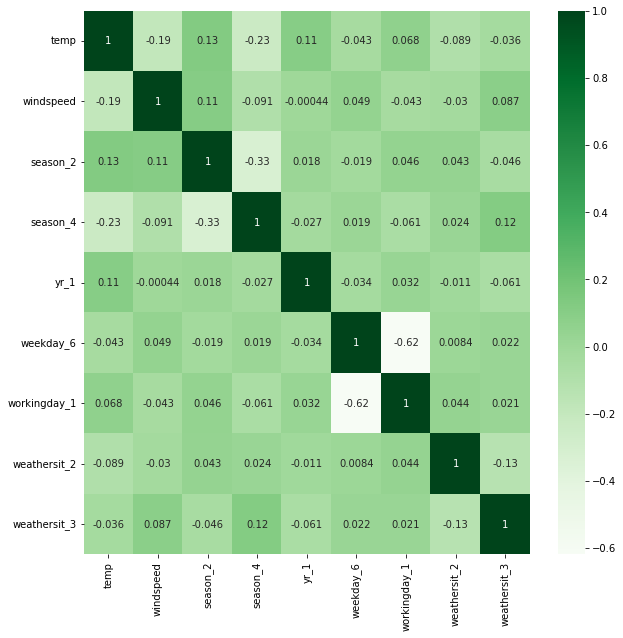

In [450]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train_6.corr(),cmap='Greens',annot=True)
plt.show()

 
- Model 5 seems to be better model with VIF < 5 and pvalue <0.05 for each independent variable while R squre values are better than model 6

## Model Evaluation

In [474]:
model=model_5
model_columns=X_train_5.columns

In [475]:
model_columns

Index(['temp', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_9',
       'holiday_1', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [476]:
X_test_filtered=X_test[model_columns]
y_test_predict=model.predict(sm.add_constant(X_test_filtered))
r2_score(y_test,y_test_predict)

0.7969008872616741

- Model is performing fairly well on test data with accuracy 79.69%

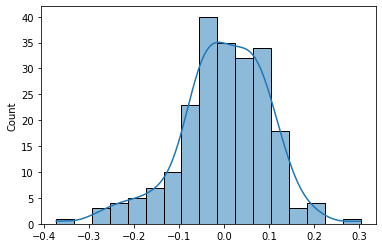

In [477]:
residual=y_test-y_test_predict
sns.histplot(residual,kde=True)
plt.show()

In [478]:
print(residual.describe())

count    220.000000
mean       0.000118
std        0.098769
min       -0.372452
25%       -0.052559
50%        0.005807
75%        0.068849
max        0.302833
dtype: float64


- Residual is following normal distibution with mean arround 0 

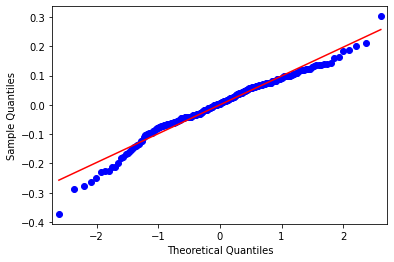

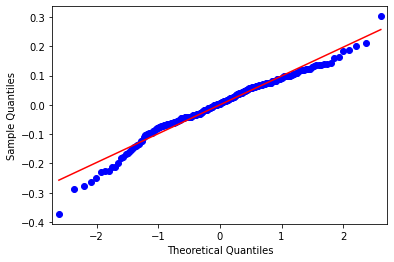

In [479]:
sm.qqplot(residual,line='s')

- qqplot showing point distubuted along y=x line . This confirms residual is following normal distribution 

<AxesSubplot:>

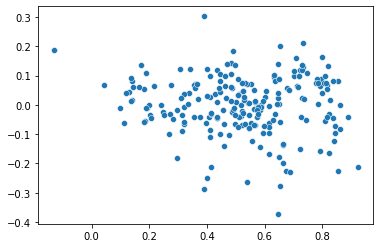

In [480]:
sns.scatterplot(y_test_predict,residual)

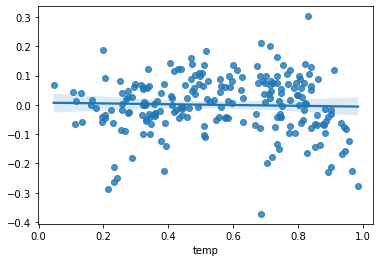

In [481]:
sns.regplot(x=X_test['temp'],y=residual)
plt.show()

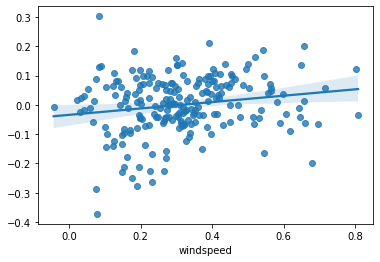

In [482]:
sns.regplot(x=X_test['windspeed'],y=residual)
plt.show()

In [483]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_test_predict))

0.009711037744188383
